In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

In [3]:
# datasets
trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [4]:
# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [5]:
# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1 * 28 * 28, 120, False)
        self.fc2 = nn.Linear(120, 84, False)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # shape of x would be 4x1x28x28
        x = x.view(-1, 1 * 28 * 28) # x.view(4, 1*28*28), this would be 4x28*28
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=120, bias=False)
  (fc2): Linear(in_features=120, out_features=84, bias=False)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [8]:
# We’ll define the same optimizer and criterion
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

torch.Size([1, 28, 28])


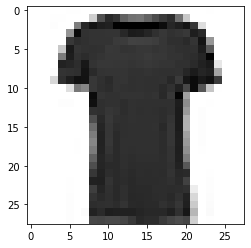

In [10]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# create grid of images
img_grid = images[0]
print(img_grid.shape)

# show images
matplotlib_imshow(img_grid, one_channel=True)

In [11]:
for epoch in range(3):  # loop over the dataset multiple times
    epoch_running_loss = 0.0
    num_steps = 0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_running_loss += loss.item()
        num_steps += 1
    batch_size = inputs.shape[0]
    epoch_average_loss = epoch_running_loss / (num_steps * batch_size)
    print(" Average training loss per sample for epoch ", epoch +1, " is ", epoch_average_loss)
print('Finished Training')

 Average training loss per sample for epoch  0  is  0.13108644968314814
 Average training loss per sample for epoch  1  is  0.09653475665057547
 Average training loss per sample for epoch  2  is  0.08679853551426829
Finished Training


In [16]:
class_preds = []
class_labels = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        output = net(images)
        _, class_preds_batch = torch.max(output, 1)

        class_preds.append(class_preds_batch)
        class_labels.append(labels)

test_preds = torch.cat(class_preds)
class_labels = torch.cat(class_labels)
print(test_preds)
print(class_labels)

tensor([9, 2, 1,  ..., 8, 1, 5])
tensor([9, 2, 1,  ..., 8, 1, 5])


In [18]:
acc = np.mean(test_preds.numpy()==class_labels.numpy())
print(acc)

0.8668
